# Introduction

The purpose of our workshop today is to learn the basic principles of machine learning and gain practical experience with linear models.

## Resources

* [CS229](https://cs229.stanford.edu/): lecture notes and slides, a more math/theory oriented course than ours.
* [Sklearn tutorial](https://scikit-learn.org/stable/modules/linear_model.html) - provides more in-depth discussion of linear models.
* [Universal Workflow for Approaching a Machine Learning Problem](https://gist.github.com/ZohebAbai/266210c08da7894789d12d2f4a289238) - mostly about NN, but the whole structure is applicable to any ML problem.

# Linear models

Before getting to the fun part, let's catch the intuition and ideas behind the whole process.

## ML problems

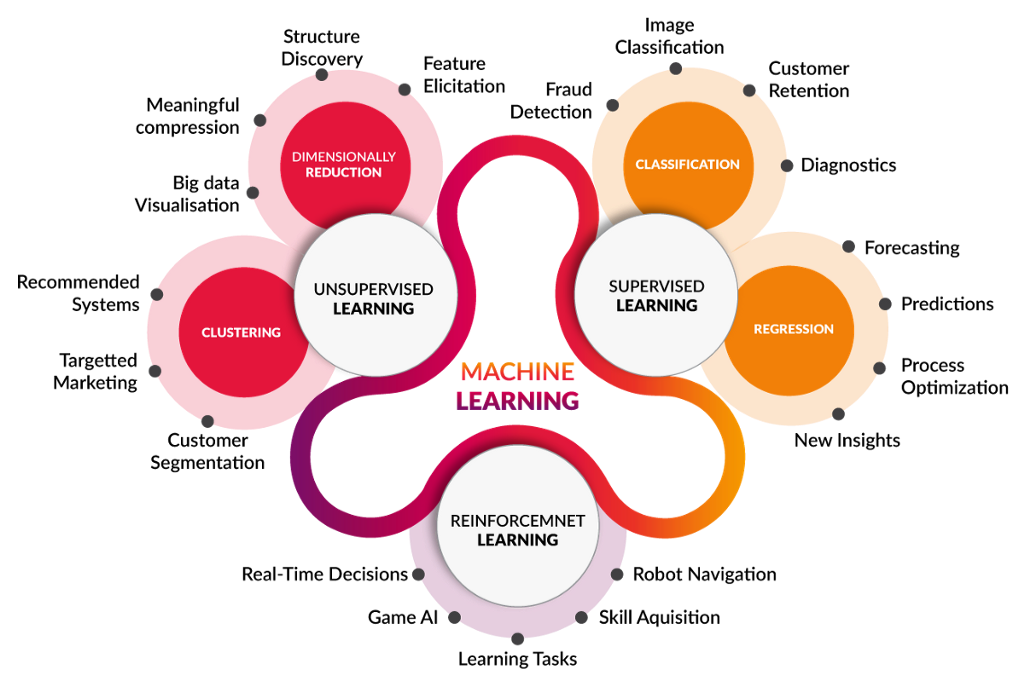

## Theory

### Definition

Matematically, a linear model is a simple weighted sum of independent variables (features):

$$y_j = \sum_{i=0}^{N} x_i * w_i + b$$

Here $y_j$ is the $j$-th target, $N$ is the total number of features, $x_i$ is the $i$-th feature, $w_i$ is the $i$-th weight, and $b$ is the bias.

In general, during this course we will mainly focus on supervised learning, and also cover selected topics in the field of unsupervised learning.

Overall, the supervised learning objectives are simple and well defined -  given features $X$, we want to predict the target(s) $Y$. Unsupervised learning is even funnier - we only have $X$ and a rough idea of ​​what we actually want to predict.

There is a clear division in supervised learning problems:
* **Classification**: $Y$ is categorical (e.g. cats vs. dogs)
* **Regression**: $Y$ is real or integer (e.g. expression or sales)

Similarly, in terms of target variables, in unsupervised field clustering is an analogue of classification, and dimensionality reduction is analogues to regression.

We begin our practical introduction to machine learning with a supervised regression problem. And our machine learning algorithm will be a linear model.


In general we can write $i$-th sample as a vector:$$ x_i = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{iN}} \end{smallmatrix} \right)$$

The whole train/test set with $S$ samples can be written as a matrix:
$$X = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1N} & 1\\
x_{21} & x_{22} &.&.&.&.& x_{2N} & 1\\
x_{31} & x_{32} &.&.&.&.& x_{3N} & 1\\
.&.&.&. &.&.&.& .\\
.&.&.&. &.&.&.& .\\
x_{S1} & x_{S2} &.&.&.&.&. x_{SN} & 1\\
x_{S1} & x_{S2} &.&.&.&.&. x_{SN} & 1\\
\end{smallmatrix} \right)_{(S,N + 1)}$$

We can represent weights and targets as column vector:  
$$W = \left (\begin{matrix} w_1 \\ w_2 \\ .\\.\\ w_j\\.\\.\\ w_N \\b \end {matrix}\right)_{(N+1,1)}
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(S,1)}$$

Therefore, the final function in vectorized form is:
$$Y = XW$$

*Remember, the matrix product is ​​calculated by multiplying rows by columns.*

### Loss functions

By one of defenitions, machine learning should improve performance according to some metrics with an increasing amount of data available for training.
* *Why is random guessing not a machine learning algorithm?*

In practice, this means that our weight vector $W$ must be **somehow** obtained based on the data $X$ in order to minimize the **somehow** measured discrepancy between the predicted $\hat{Y}$ and the real $Y$.

Obviously, there are many ways to do this. For example, we can run grid search of weights until a sufficiently good fit is found. However, this and other options are impractical and far from optimal.


---


After many years of research, the de facto standard way to optimize the parameters of many models is to use the so-called [gradient descent](https://youtu.be/IHZwWFHWa-w?t=325). I.e. we choose a smooth function (having a derivative everywhere) as a measure of the quality of the model, and then we optimize it with respect to $W$.

Such functions are called **loss functions**. They are directly optimized during the training. Here are two examples of regression loss functions:
$$L = \frac{1}{N} \sum_{i=0}^N (\hat{y_i} - y_i)^2\\
L =  \sqrt{ \frac{1}{N} \sum_{i=0}^N (\hat{y_i} - y_i)^2 } $$

Linear model weights are optimized using this approach.

*   *Why this loss function might be a bad choice for the gradient descent optimization?*
$$L = \frac{1}{N} \sum_{i=0}^N |\hat{y_i} - y_i|$$

---




Note, there are other optimization algorithms where we don't need smooth functions (such as decision trees), but their objective functions are also called loss functions. In any case, the loss functions are always directly optimized and *their minimum corresponds to a good model*.

### Metrics

Sometimes your actual performance measure is not differentiable or can be used for direct optimization. Let's say it's the classification accuracy when you count the total number of correct guesses. This is where performance metrics come in - they are simply a way to measure the performance of trained models.

That is, the difference between loss functions and metrics is that the former can be used in the optimization procedure, while the latter cannot (for various reasons). The target metric and the loss function may coincide, but this is rare.

* *How to choose target metric(s)?*

## Practice I: Toy examples

### OLS models
Ordinary least squares is a vanilla linear regression model (aka least squares models).

The definition is the same as before, our objective loss function is defined as follows:
$$L = \sum_{i=0}^N (\hat{y_i} - y_i)^2$$
* *Do we have an analytical solution to this problem?*


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

For our first example, we will load the diabetes dataset from sklearn library, which you already know by homework.

In [ ]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

In [ ]:
plt.scatter(X, y)

In [ ]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Predictions using the linear model
y_pred = lr.predict(X)

In [ ]:
# Plot the data and the linear regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# The intercept
print("Intercept: \n", lr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(X, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Now let's try to get our own analytical solution.  To do so, implement the weights formula that utilizes pseudo-inverse matrix:

$$ W = (X^{T}X)^{-1}X^{T}y $$

To do so, you have to take your $X$ matrix, which corresponds to the features, and add a column filled with ones.

In [ ]:
# Modify X matrix by adding another column with ones in it
# To do so use "np.c_" function
XX = ...
W = ...
print(W)

Now let's generate some artificial data with some sort on nonlinearity in it.

In [ ]:
# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 2 * X**2 + 1 + np.random.normal(0, 1, 100)

In [ ]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

# Predictions using the linear model
y_pred = lr.predict(X.reshape(-1, 1))

In [ ]:
# Plot the data and the linear regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
# plt.xlim(-3, 10)
# plt.ylim(-3, 25)
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# The intercept
print("Intercept: \n", lr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_absolute_error(X, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Using initial data, our regression line can't describe the nonlinear data.
* Does it mean that this is the limit of linear models in this case?
* More specifically, what exactly has to be linear in linear regression?

Let's find out:

In [ ]:
# Add a quadratic term to the predictor variable
X_quadratic = np.column_stack((X, X**2))

# Fit a linear regression model with the quadratic term
lr_quadratic = LinearRegression()
lr_quadratic.fit(X_quadratic, y)

# Predictions using the linear model with the quadratic term
y_pred_quadratic = lr_quadratic.predict(X_quadratic)

# Plot the data and the linear regression line with the quadratic term
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred_quadratic, color='green', label='Linear Regression (with Quadratic Term)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Quadratic Term Example')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lr_quadratic.coef_)
# The intercept
print("Intercept: \n", lr_quadratic.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_absolute_error(X, y_pred_quadratic))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred_quadratic))

## Practice II: Medical insurance
Now let's use real world data and implement most of the ML pipeline.

## Dataset

As before, we will work with a relatively simple [medical data set](https://www.kaggle.com/datasets/mirichoi0218/insurance), and our aim is to link the cost of insurance and simple characteristics of the patient. In other words, *predict* costs based on contractor *features*.

Let's download the data:

In [ ]:
!gdown 1MwG3_Es3hM1uKEDCeRgjN-YQ0Q0l-Yia
!ls

And check the structure:

In [ ]:
import pandas as pd

df = pd.read_csv("LM-2.insurance.csv.gz")
df.head(n=10)

Know your data! Here is the description of the columns:


*   *Age* - age of primary beneficiary
*   *Sex* - insurance contractor sex
*   *BMI* - body mass index, calculated as $\frac{weight}{height^2}$
*   *Children* - number of children/dependents covered by insurance
*   *Smoker* - tobacco smoking
*   *Region* - patient's area of ​​residence in the United States
*   *Charges* - individual medical expenses covered by health insurance. **This is our *target* variable.**

## Data cleansing

First, let's check the total number of NAs:

In [ ]:
print(f"Total NA values: {df.isna().sum().sum()}")

And derived column data types:

In [ ]:
df.dtypes

There are 3 unstructured columns (strings?), let's check their values:

In [ ]:
for col in 'sex', 'smoker', 'region':
  print(f"{col}\n{df[col].value_counts()}\n")

Everything seems to be in order. Let's convert these columns to categorical:

In [ ]:
for col in 'sex', 'smoker', 'region':
  df[col] = df[col].astype('category')

In [ ]:
df.dtypes

Now everything is ready for analysis.

## EDA

First, the simplest - correlations:

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr('spearman', numeric_only=True)
# These lines are executed implicitly!
sns.heatmap(corr, annot=True) #ax=ax)

As expected, costs correlate strongly with age. Unfortunately, the older you are, the more expensive it is for you to stay alive.

Next, let's plot the distribution of the target variable with respect to the categorical features.

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14,6), sharex=True)

for hue, ax in zip(['sex', 'smoker'], axes):
  sns.violinplot(data=df, x='region', y='charges', hue=hue, split=True, ax=ax)
  ax.grid()
  ax.set_ylabel("Insurance charges", fontweight='bold')
  ax.set_xlabel(None)
ax.set_xlabel("USA region", fontweight='bold')
# fig.show()

There is a slight dependence on sex and region. For example, compare the southeast and northwest regions.

But the main feature is smoking. Smokers pay not only for tobacco, but also for expensive insurance. How many smokers are in this dataset?

In [ ]:
df['smoker'].value_counts()

Relatively high number, definitely not outliers.

What about the distribution of real-valued variables?

In [ ]:
# fig = plt.figure()
# ax = fig.gca()
ax = sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker',
                  diag_kind='hist')#, ax=ax)
# fig.show()

It looks interesting, there are clear groups of people with different habits (smoking, BMI, children) who have different insurance bands.

However, the most important thing for us now is that the data is not normal. To simplify the learning process, we need to de-skew and standardize our features.

## ML-specific preprocessing

Not an EDA class today, so the above will suffice.

Our goal today is to teach machines. And since machines can only work with numbers, we first need to encode our categorical variables.

In [ ]:
df = pd.get_dummies(df, columns=['smoker', 'sex', 'region'], drop_first=True)
df.head(n=10)

*   *Are there an alternative way to encode binary variables?*
*   *When is one approach better than the other?*
*   *Why would we drop one of produced columns (done by `drop_first=True`)?



Next, let's split our data into training and test sets.

We usually need a validation set as well, but for the sake of clarity, today we'll only be using test & train:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

print("Before:")
print(f"\tData: {df.shape}")

train, test = train_test_split(df, test_size=0.3, random_state = 42)

print("After:")
print(f"\tTrain: {train.shape}")
print(f"\tTest: {test.shape}")

* *Should we be concerned about balancing and representativeness of the train/test?*

In [ ]:
plt.scatter(train['bmi'], train['charges'], color='b', s=12, label='train data')
plt.scatter(test['bmi'], test['charges'], color='r', s=12, label='test data')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.title('Train VS Test data')
plt.show()

Since some of our columns are clearly not normal, let's try power-transforming them:

In [ ]:
from sklearn.preprocessing import PowerTransformer

cols = ['age', 'bmi', 'charges']
scaler = PowerTransformer().fit(train[cols])

for data in train, test:
  data[cols] = scaler.transform(data[cols])

In [ ]:
# We forget about the test completely!
# It's used only to final-check models
sns.pairplot(train, vars=cols)

As expected, there is no way to get a Gaussian bell for evenly spaced data points. But that's okay, the real world is a harsh place.

Now we need to do the final split and convert the dataframes to raw N dimensional arrays:

In [ ]:
# Get raw numpy arrays
Ytrain, Ytest = train['charges'], test['charges']
features = [x for x in df.columns if x != 'charges']
Xtrain, Xtest = train[features].values, test[features].values

assert Xtrain.shape[0] == Ytrain.shape[0] and Xtest.shape[0] == Ytest.shape[0]
assert Xtrain.shape[1] == Xtest.shape[1] == df.shape[1] - 1

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Create and train the model using the gradient descent
lm = LinearRegression().fit(Xtrain, Ytrain)

for name, X, Y in ("train", Xtrain, Ytrain), ("test", Xtest, Ytest):
  Ypred = lm.predict(X)
  mae = np.abs(Y - Ypred).mean()
  skmae = mean_absolute_error(Y, Ypred)
  print(f"{name}: {mae:.4f} (ours), {skmae:.4f} (sklearn)")

In [ ]:
r2_score(Y, Ypred)

Let's make a simple diagnostic graph:

In [ ]:
# Commented lines are run explicitly!

# fig = plt.figure()
plt.scatter(Ytrain, lm.predict(Xtrain)) # plt.gca().scatter(...)
plt.grid() # plt.gca().grid()
plt.xlabel("$Y$", fontweight='bold', fontsize=14) # plt.gca().set_xlabel(...)
plt.ylabel("$\hat{Y}$", fontweight='bold', fontsize=14) # plt.gca().set_ylabel(...)
plt.title("Expected vs Predicted", fontsize=14) # plt.gca().set_title(...)

# Diagonal line
ax = plt.gca()
ax.plot([0, 1], [0, 1], color='black', transform=ax.transAxes)
# plt.show()

As we can see, there is a large group of people who cannot be correctly predicted with a simple linear model. If this is your final model, you will have to study these people carefully. For example, maybe they all correspond to elderly/smoking patients.

But we will go ahead and test other popular variants of the linear model....

### Loss function customization

.... but in fact they are not variants, since the formal structure of the model will be the same - a simple weighted sum of features.

The only thing that is different is the loss function. In short, people tried to regularize models, make them more robust.


**Example with humans**

So, the idea of ​​regularization is to introduce additional conditions into the model or training procedure that would limit the model complexity. This is usually done by adding $l_ 1$ or $l_ 2$ weight norms to the loss function:

$$\hat{L} = L + \alpha \sum_{i=0}^{N} |w_i| + \beta \sum_{i=0}^{N} w_i^2$$

And since during training we simply minimize the loss function, the model will be the simpler (in some sense), the higher the regularization coefficients $\alpha$ or/and $\beta$.

The benefit of using regularization is clear when you have the appropriate metrics or are facing overfitting.

*   *What is overfitting?*
*   *How can we measure model complexity?*

### Regularized LM

The theory is clear, now let's play with the code:

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Lasso - l1 norm
# Ridge - l2 norm
# Elastic Net - l1 and l2 norm

alpha = 0.1
models = {
    "OLS": LinearRegression().fit(Xtrain, Ytrain),
    "Lasso": Lasso(alpha=alpha).fit(Xtrain, Ytrain),
    "Ridge": Ridge(alpha=alpha * 1_000).fit(Xtrain, Ytrain),
    "Elastic Net": ElasticNet(alpha=alpha).fit(Xtrain, Ytrain)
}

# Train and print metrics
for name, X, Y in ("train", Xtrain, Ytrain), ("test", Xtest, Ytest):
  print(name)
  for mtype, model in models.items():
    mae = mean_absolute_error(Y, model.predict(X))
    print(f"\t{mtype}: {mae:.3f}")

Obviously, such comparisons are useless, since they depend on how strict the normalization weight in the resulting loss function is. And the latter depends on the nature of the data set and the real metrics used to evaluate the final performance.


Let's do some visualizations instead

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12.8, 8.4))

for ind, (axes, (name, model)) in enumerate(zip(axes.T, models.items())):
  # Expected vs predicted
  sc = axes[0]
  Ypred = model.predict(Xtrain)
  sc.scatter(Ypred, Ytrain)
  sc.grid()
  sc.set_xlabel("$Y$", fontsize=14)
  if ind == 0:
    sc.set_ylabel("$\hat{Y}$", fontsize=14)
  sc.set_title(name, fontweight='bold', fontsize=14)
  sc.set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
  sc.plot([0, 1], [0, 1], color='black', transform=sc.transAxes)

  # Weights barplot
  hs = axes[1]
  weights = model.coef_
  hs.bar(np.arange(len(weights)), weights)
  if ind == 0:
    hs.set_ylabel('Weight')
  hs.set(ylim=(-2, 2), xlabel='Feature index')
  hs.grid()

Pay attention to how the $l_1$ and $l_2$ regularizations worked - the first zeroed out most of the weights, and the second reduced the total weights. Let's check it formally:

In [ ]:
for name, model in models.items():
  l1 = np.abs(model.coef_).sum()
  l2 = np.power(model.coef_, 2).sum()
  print(name)
  print(f"\tl1 -> {l1:.3f}")
  print(f"\tl2 -> {l2:.3f}")

Another visualization showing the kinetics of Lasso weights as $\alpha$ increases:

In [ ]:
alphas = np.linspace(1e-10, 2, 30)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(Xtrain, Ytrain)
    coefs.append(model.coef_)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, coefs)
ax.set(xscale='log', xlabel='alpha', ylabel='Weights',
       title='Lasso weights as a function of the regularization')
ax.axvline(2, color='black', ls='--')
ax.axhline(0, color='black', ls='--')
ax.grid()
# fig.show()

That is folks. Linear models are dumb as a stone, and the only trick is to find a suitable loss function.

### Interpretation
In fact, $l_1$ regularized linear regression weights can be used to find the features that contribute the most to the overall prediction. Simply because most of the weights will be $0$ in models trained with high $\alpha$.

Let's use this observation to find features that are detrimental to predicting insurance costs:

In [ ]:
alpha = 0.1
lm = Lasso(alpha).fit(Xtrain, Ytrain)

# Sanity check
pred = lm.predict(Xtrain)
print(f"MAE: {mean_absolute_error(Ytrain, pred)}")


In [ ]:
weights = pd.DataFrame({"Weights": lm.coef_, "Features": features})
weights.sort_values("Weights")

Hooray! Smoking and age are very important factors in our problem, as confirmed by both LM analysis and EDA.

#  Robust regression estimators


### Huber loss

To overcome some of the existing problems of MSE, another loss function was introduced.

Check this formula below:

$$
L = \sum\limits_{i=1}^N h_{\delta}(y_i - \overline{y_i})
\text{, where }
h_{\delta} =
\begin{cases}
  \frac{1}{2}z^2, |z|\leq\delta \\
  \delta(|z| - \frac{1}{2}\delta), |z| > \delta
\end{cases}
$$

*   *In what manner is this loss function is superior to standard MSE?*




In [ ]:
# Generate a range of prediction errors
errors = np.linspace(-2, 2, 200)

In [ ]:
# Calculate loss for each prediction error
mse_loss = errors**2
mae_loss = np.abs(errors)
huber_loss = np.where(np.abs(errors) <= 1, 0.5 * errors**2, np.abs(errors) - 0.5)

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(errors, mse_loss, label='Squared Error (MSE)', linewidth=2)
plt.plot(errors, mae_loss, label='Absolute Error (MAE)', linewidth=2)
plt.plot(errors, huber_loss, label='Huber Loss', linewidth=2)
plt.legend()
plt.title('Loss Functions: MSE, MAE, and Huber Loss')
plt.xlabel('Prediction Error')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Huber regression

If you answered the question above correctly, then you know that such type of loss is used to deal with outliers, to whom MSE would be quite sensitive. To demonstrate this effect, let's considered a simple example:

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate synthetic data
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0
)

In [ ]:
# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

In [ ]:
# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=100, random_state=0)
ridge.fit(X, y)
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.plot(X, y, "b.")
plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()